# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

#read the pickled train, valid and test data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#print if data is loaded
print('Loaded the Successfully')

Loaded the Successfully


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

#No. of samples we will be using for training the Network
print("Number of training examples =", n_train) 
#No. of samples we will be using for validating the Network
print("Number of Validation examples =", n_validation)
#No. of samples we will be using for testing the Network to verify if it is performing accurately
print("Number of testing examples =", n_test)
#Shape of the input image H X W X no.channels
print("Image data shape =", image_shape)
#No. of unique labels or classes we need to classify our dataset into.
print("Number of classes/labels =", n_classes)

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes/labels = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Visualize the CSV file with all unique Signs and respective Ids

In [4]:
# Data exploration visualization code goes here 
# Display the CSV file all 43 classes and the respective Id's

import pprint
import pandas

# reading csv and displaying ClassId as first column
signs = pandas.read_csv('signnames.csv', index_col = 'ClassId')

#pprint.pprint(signs)
print(signs)

                                                  SignName
ClassId                                                   
0                                     Speed limit (20km/h)
1                                     Speed limit (30km/h)
2                                     Speed limit (50km/h)
3                                     Speed limit (60km/h)
4                                     Speed limit (70km/h)
5                                     Speed limit (80km/h)
6                              End of speed limit (80km/h)
7                                    Speed limit (100km/h)
8                                    Speed limit (120km/h)
9                                               No passing
10            No passing for vehicles over 3.5 metric tons
11                   Right-of-way at the next intersection
12                                           Priority road
13                                                   Yield
14                                                    St

### Visualize a portion of Input (Features) Training Data Set 

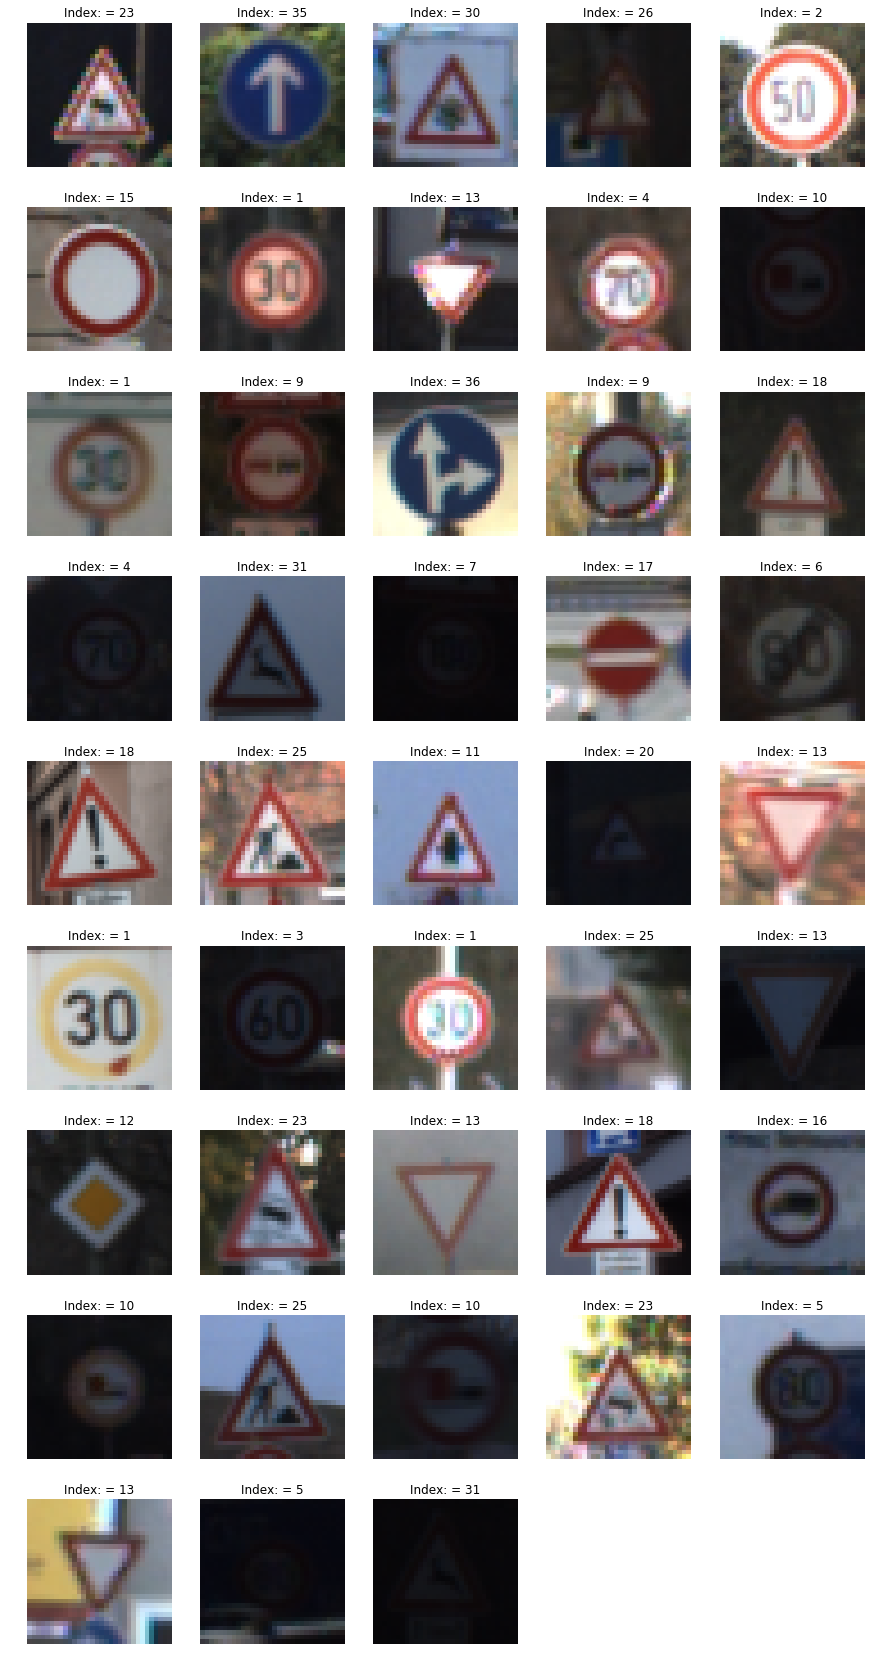

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

#no. of rows and figure size
r = 9
plt.figure(figsize=(15, 30))

# displaying no. of unique samples from X_train data set
for i in range(n_classes):
    # randomly select the samples from X_train data set
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    
    plt.subplot(r,5,i+1)
    # title each plot with corresponding index from y_train data
    plt.title('Index: = {}'.format(y_train[index]))
    plt.axis('off')
    plt.imshow(image)
    

### Histogramic View Representing Distribution of samples of each class type

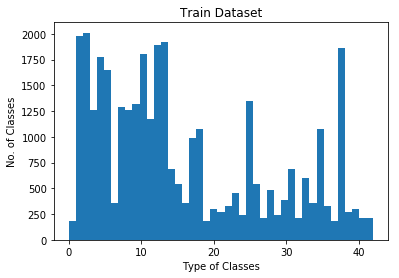

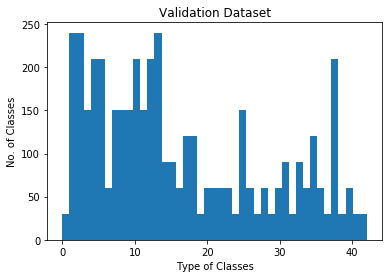

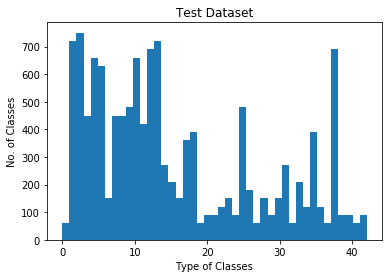

In [6]:
# No. of samples of each class (total n_classes - 43 classes) in training (Label) data set
plt.hist(y_train,n_classes)
plt.title("Train Dataset")
plt.xlabel("Type of Classes")
plt.ylabel("No. of Classes")
plt.show()

# No. of samples of each class (total n_classes - 43 classes) in validation (Label) data set
plt.hist(y_validation,n_classes)
plt.title("Validation Dataset")
plt.xlabel("Type of Classes")
plt.ylabel("No. of Classes")
plt.show()

# No. of samples of each class (total n_classes - 43 classes) in test (Label) data set
plt.hist(y_test,n_classes)
plt.title("Test Dataset")
plt.xlabel("Type of Classes")
plt.ylabel("No. of Classes")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.color import rgb2gray

def normalize_image(image_rgb):

    #image_gray = rgb2gray(image_rgb)
    image_gray = np.sum(image_rgb/3, axis=3, keepdims=True)
    image_normalize = (image_gray - 128) / 128
    return image_rgb, image_gray, image_normalize

X_train_original, X_train_grayscale, X_train_normalize = normalize_image(X_train)
X_validation_original, X_validation_grayscale, X_validation_normalize = normalize_image(X_validation)
X_test_original, X_test_grayscale, X_test_normalize = normalize_image(X_test)

print('X_train normalized image shape -', X_train_normalize.shape)
print('X_train grayscale image shape -', X_train_grayscale.shape)
print('X_train original image shape -', X_train_original.shape)

print('X_validation normalized image shape -', X_validation_normalize.shape)
print('X_validation grayscale image shape -', X_validation_grayscale.shape)
print('X_validation original image shape -', X_validation_original.shape)

print('X_test normalized image shape -', X_test_normalize.shape)
print('X_test validation image shape -', X_test_grayscale.shape)
print('X_test original image shape -', X_test_original.shape)


X_train normalized image shape - (34799, 32, 32, 1)
X_train grayscale image shape - (34799, 32, 32, 1)
X_train original image shape - (34799, 32, 32, 3)
X_validation normalized image shape - (4410, 32, 32, 1)
X_validation grayscale image shape - (4410, 32, 32, 1)
X_validation original image shape - (4410, 32, 32, 3)
X_test normalized image shape - (12630, 32, 32, 1)
X_test validation image shape - (12630, 32, 32, 1)
X_test original image shape - (12630, 32, 32, 3)


### Visualize a portion of Pre-Processed Input (Features) Training Data Set 

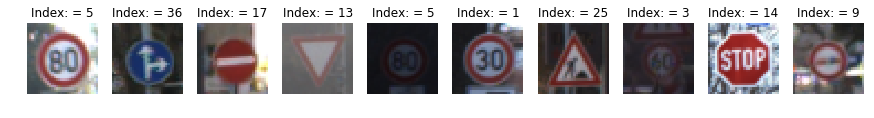

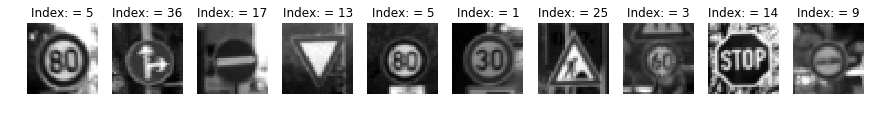

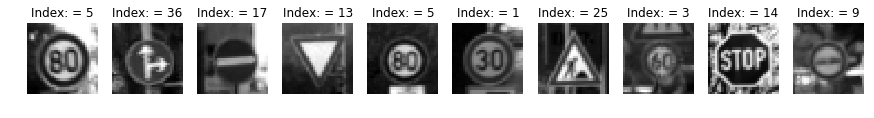

In [8]:
import random
import matplotlib.pyplot as plt
import pandas
%matplotlib inline


fig, axs = plt.subplots(1,10, figsize=(15, 6)) # defining subplots for X_train image
fig_1, axs_1 = plt.subplots(1,10, figsize=(15, 6))# defining subplots for X_grayscale image
fig_2, axs_2 = plt.subplots(1,10, figsize=(15, 6))# defining subplots for X_test image

for i in range(10):
        # randomly select the samples from X_train data set
        index = random.randint(0, len(X_train))
        #rgb original image
        image = X_train[index].squeeze()
        #grayscale image
        image_gray = X_train_grayscale[index].squeeze()
        #normalized image
        image_normalize = X_train_normalize[index].squeeze()
            
        #display the original image    
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title('Index: = {}'.format(y_train[index]))
    
        #display the grayscale image    
        axs_1[i].axis('off')
        axs_1[i].imshow(image_gray, cmap ='gray')
        axs_1[i].set_title('Index: = {}'.format(y_train[index]))
    
        #display the normalized image    
        axs_2[i].axis('off')
        axs_2[i].imshow(image_normalize, cmap = 'gray')
        axs_2[i].set_title('Index: = {}'.format(y_train[index]))
                
  

### Shuffle and Input the normalize data for Training, Validating and Testing the Network Model

In [9]:
from sklearn.utils import shuffle

# here we are shuffling the data as ordering of the data impacts how well the network is being trained
X_train, y_train = shuffle(X_train_normalize, y_train)
X_validation, y_validation = shuffle(X_validation_normalize, y_validation)
X_test, y_test = shuffle(X_test_normalize, y_test)

print('Training data - X_train Normalized image shape -', X_train.shape)
print('Validation data - X_validation Normalized image shape -', X_validation.shape)
print('Test data - X_test Normalized image shape -', X_test.shape)

Training data - X_train Normalized image shape - (34799, 32, 32, 1)
Validation data - X_validation Normalized image shape - (4410, 32, 32, 1)
Test data - X_test Normalized image shape - (12630, 32, 32, 1)


###  Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [10]:
# Load Tensorflow
import tensorflow as tf

# how many times the training data is ran through the network
EPOCHS = 65

#no. of batches in which each training set is divided. 
BATCH_SIZE = 128


### Model Architecture 


### Input
The Model architecture accepts a 32x32xC image as input, where C is the number of color channels. Images are normalized-grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Regularization.** Your choice of probability to keep units.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Regularization.** Your choice of probability to keep units.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.


``` Formula to use for calculating with VALID strides:
out_h = ((input_h - filter_h) + 1)/strides(h) and out_w = ((input_w - filter_w) + 1)/strides(w)```

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Layer 1 : Activation.
    conv1 = tf.nn.relu(conv1, name = 'convolution1')
    
    # Layer 1 : Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name = 'convolution2')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.bias_add(conv2, conv2_b)
    
    # Layer 2 : Activation.
    conv2 = tf.nn.relu(conv2, name = 'convolution3')

    # Layer 2 : Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name = 'convolution4')

    # Layer 2 : Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc0_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc0_b = tf.Variable(tf.zeros(120))
    fc0 = tf.add(tf.matmul(fc0, fc0_w), fc0_b)
    
    # Layer 3 : Activation.
    fc0 = tf.nn.relu(fc0)
    
    # Layer 3 : Dropout prob 50%
    fc0 = tf.nn.dropout(fc0, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(84))
    fc1 = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
               
    # Layer 4 : Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4 : Dropout prob 50%
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    fc2 = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    logits = fc2

    
    return logits

### Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [12]:
#x is placeholder that will store input batches
# it is initialized with None, so that later it can store bactch of any size
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

#y is placeholder that will store labels
# it is initialized with None, so that later it can store labels of any size
# in this case our labels are coming through sparse variable means they are integers and not hot encoded yet
y = tf.placeholder(tf.int32, (None))

# one-hot encode the labels
one_hot_y = tf.one_hot(y, 43)

# placeholder - probability to keep - dropout Regularization
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [13]:
# learning rate tell tensorflow how quickly to update the weights 
rate = 0.00097

# send input data to LeNet function to get logits
logits = LeNet(x)

# below function is use to compare the logits with ground-truth one hot encoded labels to determine cross - entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# determines the cost or loss by avergaing the cross entropy from all training images
loss_operation = tf.reduce_mean(cross_entropy)

# the opmitiser helps to minimize teh loss function at the given learning rate - same as stoschastic gradient descent
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

#this uses the back propogation to update our function (adjusting weights and biases) and minimize our training losses
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [14]:
#Compare the given prediction is correct by comparing the logit prediction to one hot encoded ground truth label

# calculate individual accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# calculate the overall accuracy of the model by averaging the model individual prediction accuracy.
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# for saving the model variables so that can be used in future
saver = tf.train.Saver()

# run the evaluation pipeline starts here- running the accuracy models defined above
# takes a data set as an input
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Train and Validate the Network Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [14]:
# Empty array for storing validation accuracy after each epoch run
validation_accuracy_epochs = []
loss_epochs = []

# set the session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    #training over no. of epochs set before
    for i in range(EPOCHS):
        # shuffle the data matters while training - to make sure the training is not biased due to order of incoming images
        X_train, y_train = shuffle(X_train, y_train)
        # determine each batch and run each batch individually till entire data set is complete
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5}) # note the dropout prob is set to 50%

         
        #evaluate the model by calling the function evaluate to calculate the accuracy    
        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy_epochs.append(validation_accuracy)
        loss_epochs.append(loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # once the model is completely trained we save it
    # this is done so that we can load the data later and modify ot or evaluate the model on our test data set    
    saver.save(sess, './trained_model')
    print("Trained Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.659

EPOCH 2 ...
Validation Accuracy = 0.808

EPOCH 3 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.906

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.925

EPOCH 8 ...
Validation Accuracy = 0.927

EPOCH 9 ...
Validation Accuracy = 0.931

EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.935

EPOCH 12 ...
Validation Accuracy = 0.939

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.936

EPOCH 15 ...
Validation Accuracy = 0.939

EPOCH 16 ...
Validation Accuracy = 0.942

EPOCH 17 ...
Validation Accuracy = 0.945

EPOCH 18 ...
Validation Accuracy = 0.946

EPOCH 19 ...
Validation Accuracy = 0.945

EPOCH 20 ...
Validation Accuracy = 0.948

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.958

EPOCH 23 ...
Validation Accuracy = 0.954

EPOCH 24 ...
Validation Accura

#### Plot Validation accurary progress per Epochs

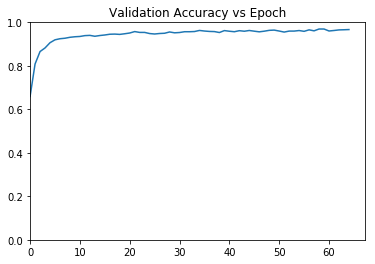

Validation Accuracy = 0.967


In [15]:
plt.plot(validation_accuracy_epochs)

plt.ylim(0, 1.0) 
plt.xlim(0, ) 
plt.title("Validation Accuracy vs Epoch")
plt.show()

print("Validation Accuracy = {:.3f}".format(validation_accuracy))

####  Plot the Loss Minimized per Epochs

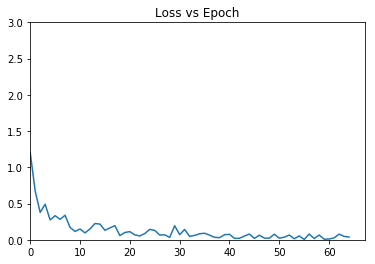

Loss = [1.2055211, 0.67283982, 0.37812796, 0.49060151, 0.27479461, 0.33260599, 0.28209922, 0.33859381, 0.17103304, 0.1153129, 0.14904335, 0.095406666, 0.14970252, 0.22454399, 0.21706881, 0.13079172, 0.16451678, 0.19513749, 0.058647282, 0.10073344, 0.11269574, 0.068107687, 0.052972227, 0.086003959, 0.14422658, 0.12949015, 0.06627892, 0.068396203, 0.033591747, 0.19375491, 0.07117407, 0.14269967, 0.046840221, 0.061229445, 0.0833674, 0.090436623, 0.064753227, 0.033755288, 0.029507767, 0.069727875, 0.075800307, 0.020007128, 0.020317277, 0.052029386, 0.079607554, 0.018954476, 0.063420042, 0.023435885, 0.022710202, 0.077680506, 0.022250878, 0.036503654, 0.065923437, 0.014596512, 0.053094946, 0.0049135643, 0.079618603, 0.017699983, 0.065958954, 0.0081786877, 0.010811413, 0.026722075, 0.078363791, 0.047379043, 0.037541959]


In [16]:
plt.plot(loss_epochs)

plt.ylim(0, 3.0) 
plt.xlim(0, ) 
plt.title("Loss vs Epoch")
plt.show()

print("Loss = {}".format(loss_epochs))

#### Test and Evaluate the Network Model

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.



In [15]:
saver = tf.train.Saver()

with tf.Session() as sess:
    # restore the saved values
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # use test dataset to check the model accuracy
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trained_model
Test Accuracy = 0.944


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Input Image Shape =  (138, 164, 3)
Resized Image Shape =  (32, 32, 3)


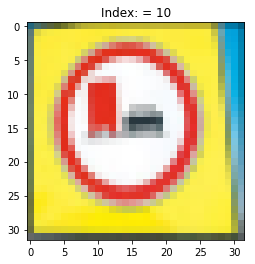

Input Image Shape =  (32, 32, 3)
Resized Image Shape =  (32, 32, 3)


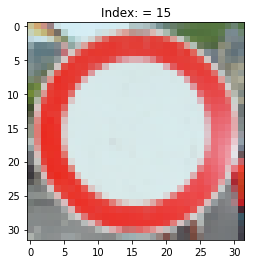

Input Image Shape =  (483, 566, 3)
Resized Image Shape =  (32, 32, 3)


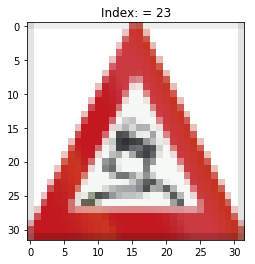

Input Image Shape =  (75, 75, 3)
Resized Image Shape =  (32, 32, 3)


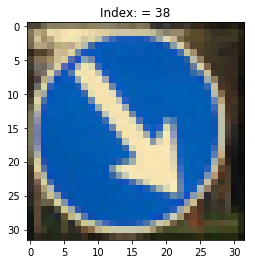

Input Image Shape =  (179, 190, 3)
Resized Image Shape =  (32, 32, 3)


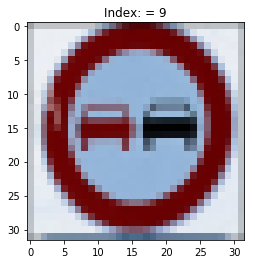

Input Image Shape =  (32, 32, 3)
Resized Image Shape =  (32, 32, 3)


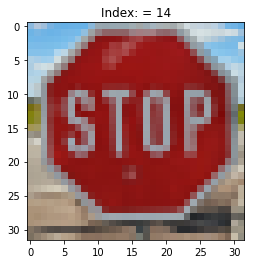

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
%matplotlib inline  

new_test_image = []

test_labels = np.array([10, 15, 23, 38, 9, 14])

index = 0
# Take all images to test
images = sorted(glob.glob('./new_images1/*.png'))
for filename in images:
    #  2.1 Reading files for filename 
    img =cv2.imread(filename)
    print('Input Image Shape = ', img.shape)
    img = cv2.resize(img,(32,32),interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('Resized Image Shape = ', img.shape)
    plt.imshow(img)
    plt.title('Index: = {}'.format(test_labels[index]))
    plt.show()
    index=index+1
    new_test_image.append(img)
    

### Normalize the new images

In [33]:
import numpy as np
# Put the images in an array for precessing
new_test_images = np.array(new_test_image)

# Check size
print(new_test_images.shape)

(6, 32, 32, 3)


In [34]:
# Normalize the Images
new_test_images_original, new_test_images_grayscale, new_test_images_normalize = normalize_image(new_test_images)
print('new_test_images normalized image shape -', new_test_images_normalize.shape)
print('new_test_images grayscale image shape -', new_test_images_grayscale.shape)
print('new_test_images original image shape -', new_test_images_original.shape)

new_test_images normalized image shape - (6, 32, 32, 1)
new_test_images grayscale image shape - (6, 32, 32, 1)
new_test_images original image shape - (6, 32, 32, 3)


### Visualize the Normalized Images

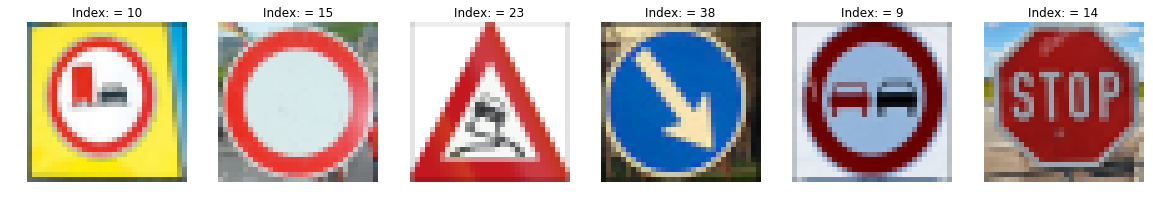

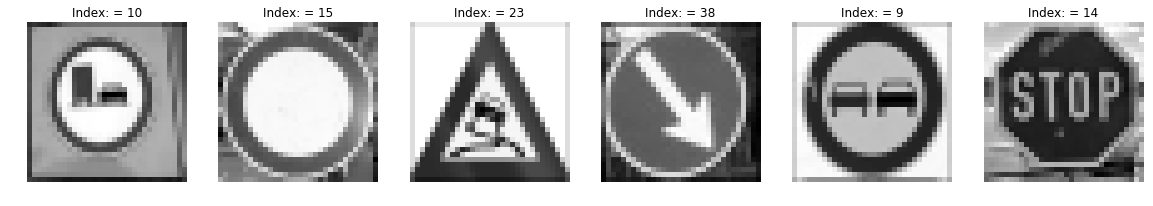

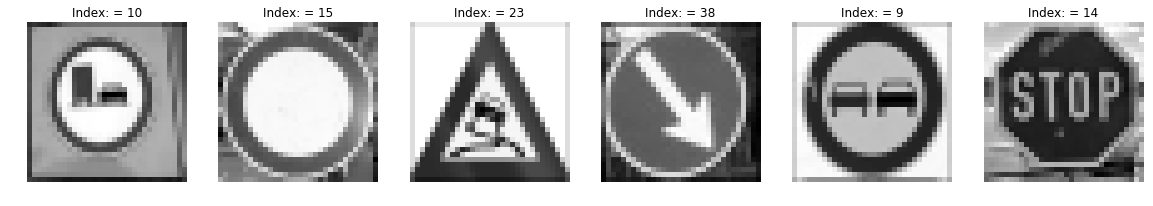

In [35]:
import random
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

no = len(new_test_images)

fig, axs = plt.subplots(1,no, figsize = (20, 10)) # defining subplots for X_train image
fig_1, axs_1 = plt.subplots(1,no, figsize = (20, 10))# defining subplots for X_grayscale image
fig_2, axs_2 = plt.subplots(1,no, figsize = (20, 10))# defining subplots for X_test image

for i in range(6):
    
        index = i

        #rgb original image
        image = new_test_images[index].squeeze()
        #grayscale image
        image_gray = new_test_images_grayscale[index].squeeze()
        #normalized image
        image_normalize = new_test_images_normalize[index].squeeze()
            
        #display the original image    
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title('Index: = {}'.format(test_labels[index]))
    
        #display the grayscale image    
        axs_1[i].axis('off')
        axs_1[i].imshow(image_gray, cmap ='gray')
        axs_1[i].set_title('Index: = {}'.format(test_labels[index]))
    
        #display the normalized image    
        axs_2[i].axis('off')
        axs_2[i].imshow(image_normalize, cmap = 'gray')
        axs_2[i].set_title('Index: = {}'.format(test_labels[index]))
                
  

### Determine the Accuracy

In [36]:
# Run the evaluation with the new testing data

test_labels = np.array([10, 15, 23, 38, 9, 14])
y_labels = test_labels

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./trained_model.meta')
    saver.restore(sess, "./trained_model")
    
    test_accuracy = evaluate(new_test_images_normalize, y_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trained_model
Test Accuracy = 1.000


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./trained_model


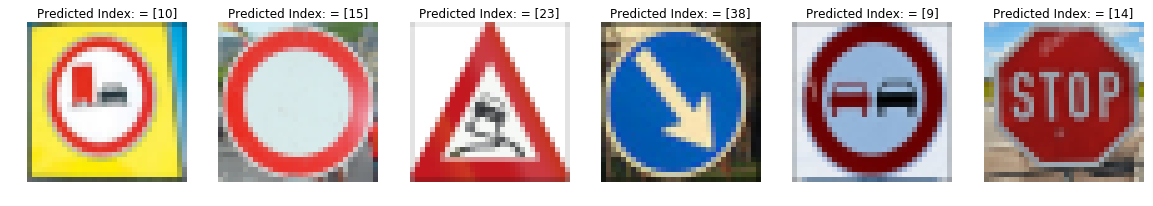

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./trained_model.meta')
    saver.restore(sess, "./trained_model")
    test_softmax = sess.run(softmax_logits,feed_dict = {x: new_test_images_normalize,keep_prob: 1.0})
    test_top_k = sess.run(top_k, feed_dict={x: new_test_images_normalize,keep_prob: 1.0})
    

no = len(new_test_images)

fig, axs = plt.subplots(1, no, figsize = (20, 10)) # defining subplots for X_train image

axs = axs.ravel()
for i in range(6):

        #rgb original image
        image = new_test_images[i].squeeze()
            
        #display the original image    
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title('Predicted Index: = {}'.format(test_top_k[1][i]))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [39]:

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./trained_model.meta')
    saver.restore(sess, "./trained_model")
    test_softmax = sess.run(softmax_logits,feed_dict = {x: new_test_images_normalize,keep_prob: 1.0})
    test_top_k = sess.run(top_k, feed_dict={x: new_test_images_normalize,keep_prob: 1.0})
print(test_softmax)
print(test_top_k)

INFO:tensorflow:Restoring parameters from ./trained_model
[[  1.08671854e-33   6.50855804e-25   1.51642611e-20   4.74165126e-29
    1.59832477e-11   9.43189749e-10   0.00000000e+00   1.28994273e-07
    1.88389546e-13   4.24288629e-15   9.99999881e-01   4.23369397e-34
    7.74998199e-09   7.35268592e-26   2.50413340e-21   7.29705914e-17
    9.84352709e-14   1.45309165e-26   2.07220101e-29   1.02464039e-22
    8.84380029e-25   4.27197533e-29   0.00000000e+00   6.79769848e-22
    1.81425103e-37   1.53871042e-18   3.31468332e-19   0.00000000e+00
    8.58450797e-38   3.25799127e-29   1.44792773e-28   6.08264214e-22
    4.68784048e-36   5.18252332e-19   1.59074583e-37   5.77756126e-24
    9.76302891e-37   3.19432014e-20   2.57103436e-24   2.98304251e-25
    4.26805036e-10   6.28692876e-33   4.37375271e-20]
 [  9.88910343e-13   4.77193618e-09   7.73597606e-07   1.07490988e-10
    1.26964769e-05   2.00982686e-06   9.98400700e-15   2.40202591e-09
    1.66554379e-08   1.26145913e-10   2.27321764

### Visualize Top 5 guess and probabilities for Test Images

INFO:tensorflow:Restoring parameters from ./trained_model


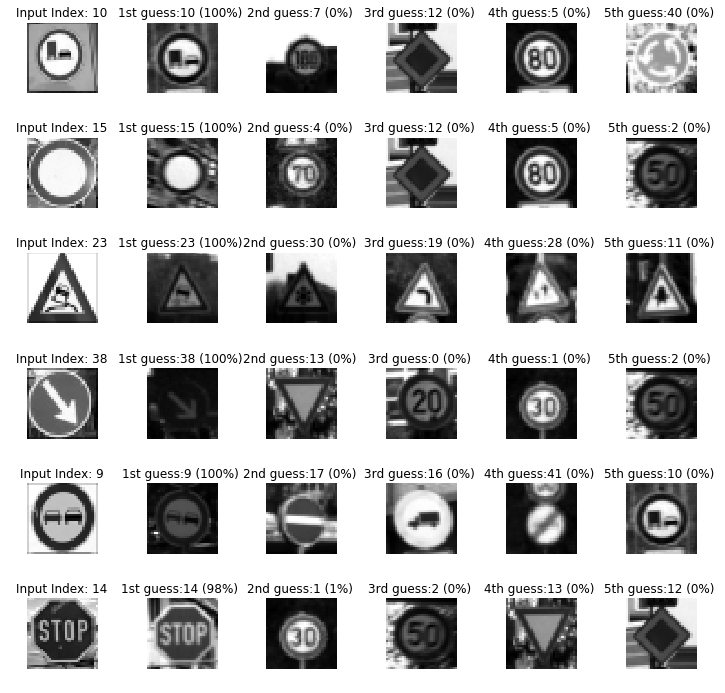

In [40]:
n = 6

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./trained_model.meta')
    saver.restore(sess, "./trained_model")
    test_softmax = sess.run(softmax_logits,feed_dict = {x: new_test_images_normalize,keep_prob: 1.0})
    test_top_k = sess.run(top_k, feed_dict={x: new_test_images_normalize,keep_prob: 1.0})
    
    fig, axs = plt.subplots(len(new_test_images_normalize), n, figsize=(12, 12))
    fig.subplots_adjust(hspace = .5, wspace=.7)
    axs = axs.ravel()

    for i, image in enumerate(new_test_images_normalize):

        axs[n*i].axis('off')
        axs[n*i].imshow(image.squeeze(), cmap='gray')
        #axs[n*i].set_title('input')
        axs[n*i].set_title('Input Index: {}'.format(test_labels[i]))
        
        top1 = test_top_k[1][i][0]
        idx1 = np.argwhere(y_validation == top1)[0]
        axs[n*i+1].axis('off')
        axs[n*i+1].imshow(X_validation[idx1].squeeze(), cmap='gray')
        axs[n*i+1].set_title('1st guess:{} ({:.0f}%) '.format(top1, 100*test_top_k[0][i][0]))
        
        top2 = test_top_k[1][i][1]
        idx2 = np.argwhere(y_validation == top2)[0]
        axs[n*i+2].axis('off')
        axs[n*i+2].imshow(X_validation[idx2].squeeze(), cmap='gray')
        axs[n*i+2].set_title('2nd guess:{} ({:.0f}%) '.format(top2, 100*test_top_k[0][i][1]))
        
        top3 = test_top_k[1][i][2]
        idx3 = np.argwhere(y_validation == top3)[0]
        axs[n*i+3].axis('off')
        axs[n*i+3].imshow(X_validation[idx3].squeeze(), cmap='gray')
        axs[n*i+3].set_title('3rd guess:{} ({:.0f}%) '.format(top3, 100*test_top_k[0][i][2]))
        
        top4 = test_top_k[1][i][3]
        idx4 = np.argwhere(y_validation == top4)[0]
        axs[n*i+4].axis('off')
        axs[n*i+4].imshow(X_validation[idx4].squeeze(), cmap='gray')
        axs[n*i+4].set_title('4th guess:{} ({:.0f}%) '.format(top4, 100*test_top_k[0][i][3]))
        
        top5 = test_top_k[1][i][4]
        idx5 = np.argwhere(y_validation == top5)[0]
        axs[n*i+5].axis('off')
        axs[n*i+5].imshow(X_validation[idx5].squeeze(), cmap='gray')
        axs[n*i+5].set_title('5th guess:{} ({:.0f}%) '.format(top5, 100*test_top_k[0][i][4]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [41]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./trained_model


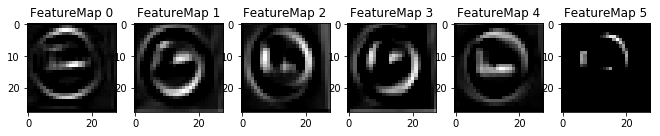

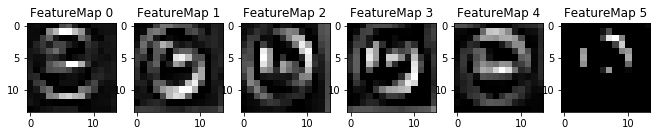

In [62]:
with tf.Session() as sess:

    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('convolution1:0')
    outputFeatureMap(new_test_images_normalize,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    
    conv1 = sess.graph.get_tensor_by_name('convolution2:0')
    outputFeatureMap(new_test_images_normalize,conv1, activation_min=-1, activation_max=-1, plt_num=2)
    
    #conv2 = sess.graph.get_tensor_by_name('convolution3:0')
    #outputFeatureMap(new_test_images_normalize,conv2, activation_min=-1, activation_max=-1, plt_num=2)
    
    #conv2 = sess.graph.get_tensor_by_name('convolution4:0')
    #outputFeatureMap(new_test_images_normalize,conv2, activation_min=-1, activation_max=-1, plt_num=3)